In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def imshow(title = 'Image', image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [7]:
import requests

url = "https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/scan.jpeg"
response = requests.get(url)

with open("scan.jpeg", "wb") as file:
    file.write(response.content)
print("Arquivo baixado com sucesso!")


Arquivo baixado com sucesso!


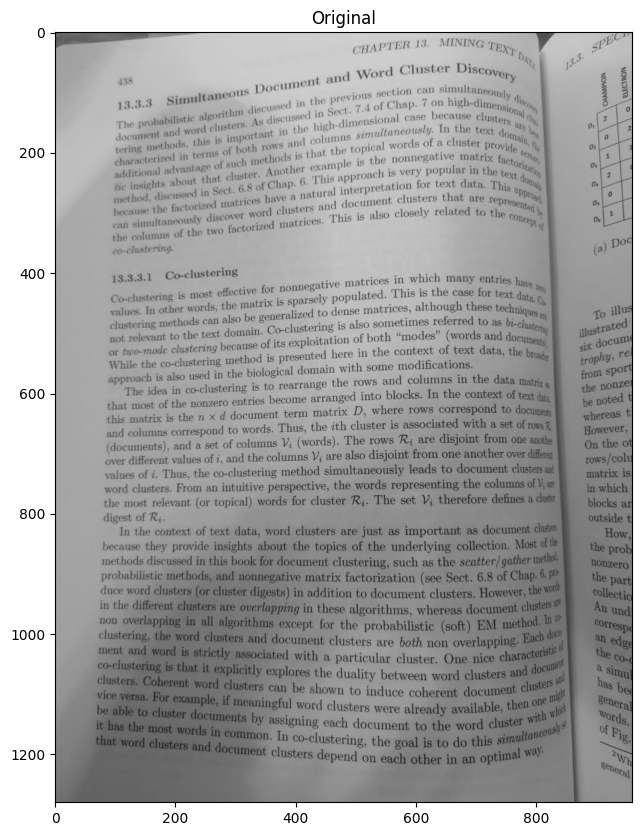

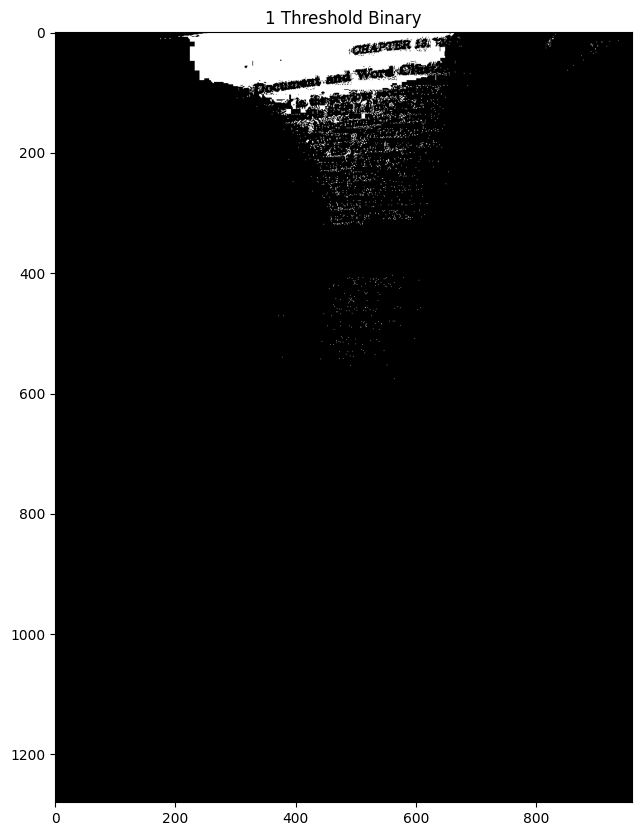

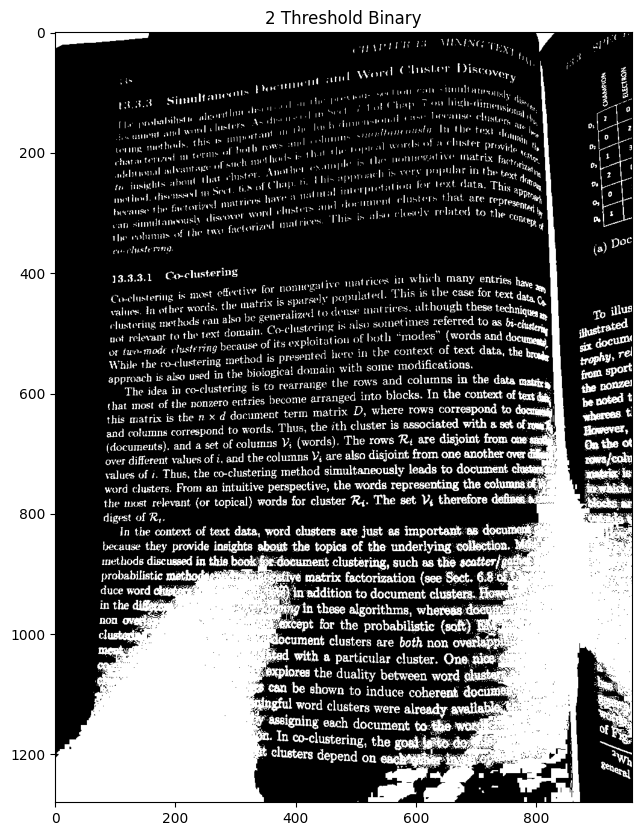

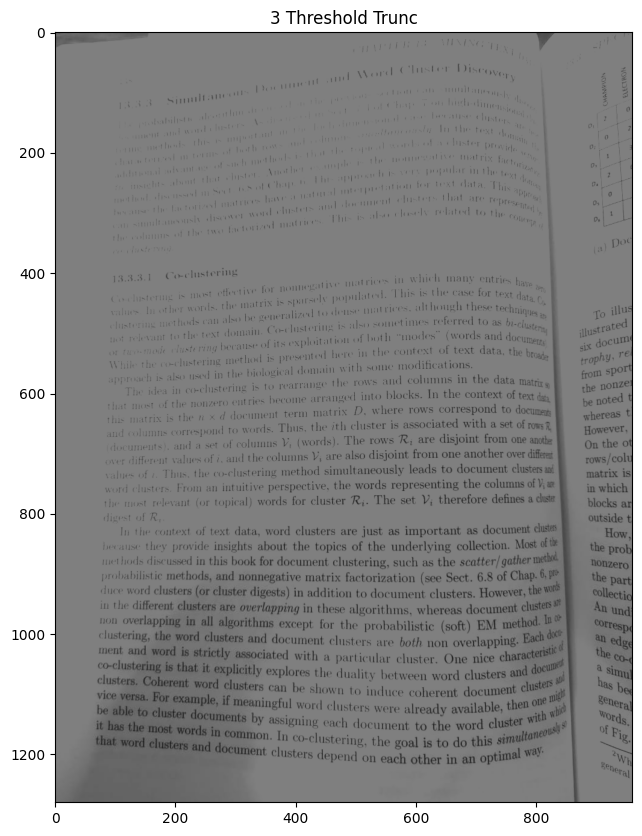

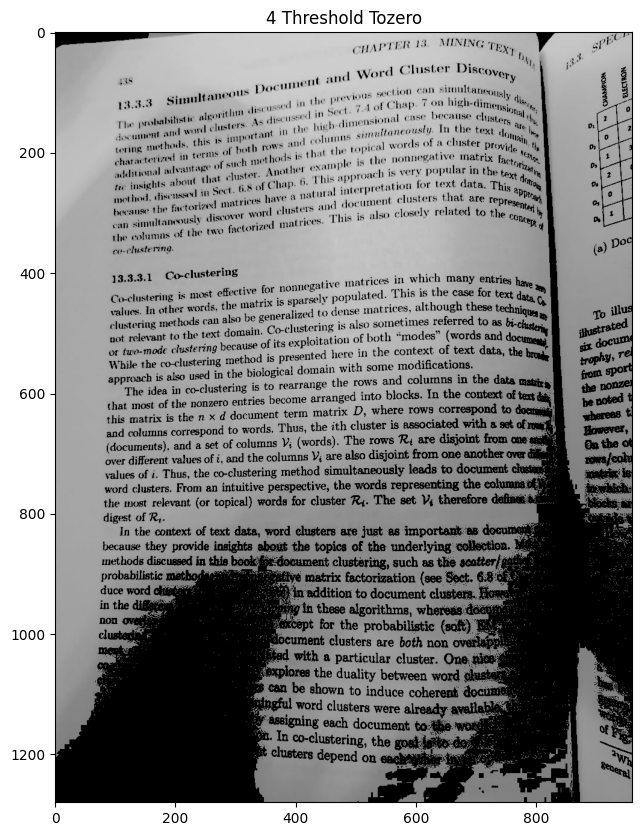

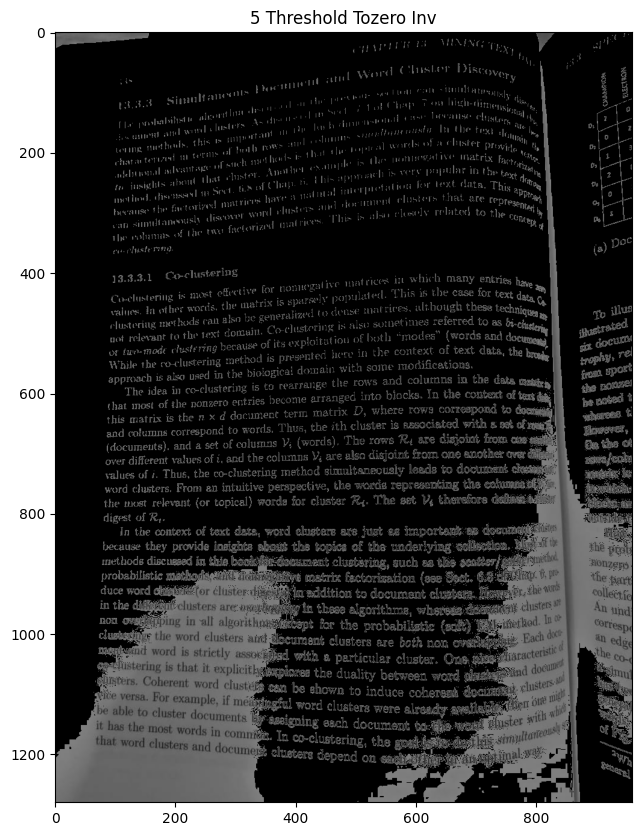

In [10]:
#Load our image as greyscale
image = cv2.imread(r'C:\Users\vish8\OneDrive\Desktop\Cursos\ComputerVision\OpenCv\ImageOperation\extracted_images\images\scan.jpeg',0)
imshow('Original', image)

#Values bellow 127 goes to 0 (black, everything above goes to 255(white))
ret, thresh1 = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)
imshow('1 Threshold Binary', thresh1)

ret, thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
imshow('2 Threshold Binary', thresh2)

ret, thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
imshow('3 Threshold Trunc', thresh3)

ret, thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
imshow('4 Threshold Tozero', thresh4)

ret, thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
imshow('5 Threshold Tozero Inv', thresh5)

# Adaptive Thresholding

1. **ADAPTIVE_THRESH_MEAN_C**
2. **THRESH_OTSU**

### cv2.adaptiveThreshold Parameters

**Sintaxe:**
```python
cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst


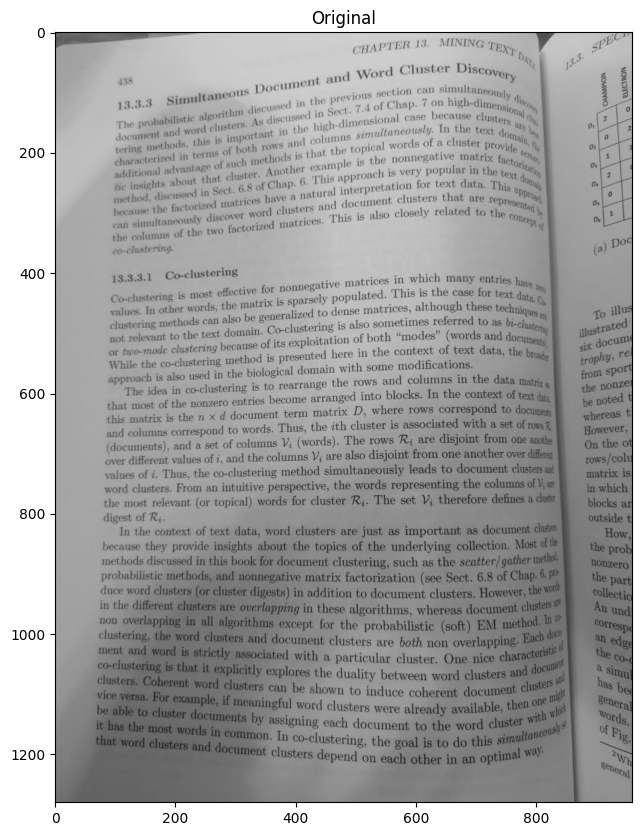

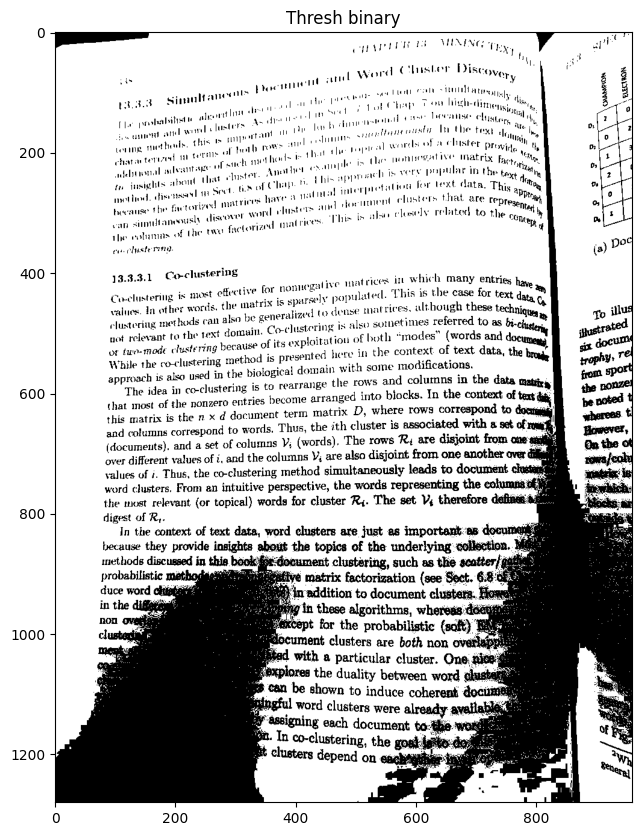

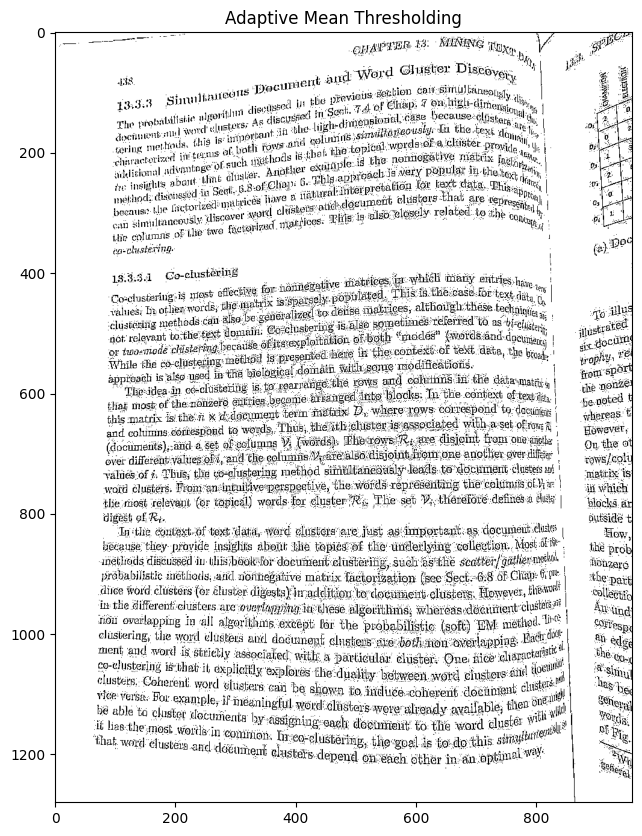

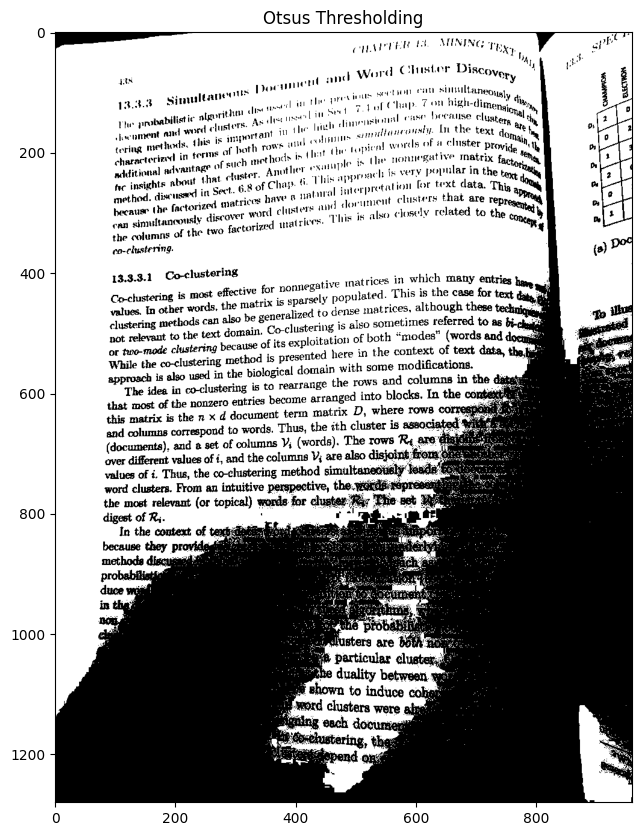

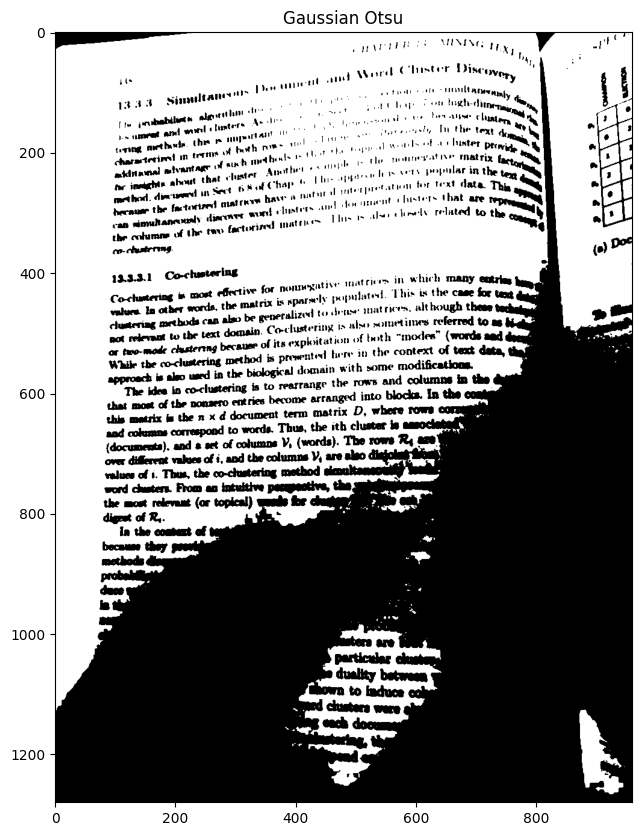

In [12]:
image = cv2.imread(r'C:\Users\vish8\OneDrive\Desktop\Cursos\ComputerVision\OpenCv\ImageOperation\extracted_images\images\scan.jpeg',0)
imshow('Original', image)

#Adaptive Thresholding
ret, thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow('Thresh binary', thresh1)

#it's good practice to blur images as it removes noise
#image = cv2.GaussianBlur(image, (3,3), 0)

#Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5)
imshow('Adaptive Mean Thresholding', thresh)

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('Otsus Thresholding', th2)

#Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('Gaussian Otsu', th3)

## Skimage Threshold Local

The threshold_local function, calculates thresholds in regions wwith a chareacteristic size 'block_size' surroundin each pixel (i.e local neighborhoods). Each threshld value is the weigted mean of the lpcal neighborhood minus an offset value

In [14]:
!pip install skimage

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      
      *** Please install the `scikit-image` package (instead of `skimage`) ***
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [18]:
from skimage.filters import threshold_local

image = cv2.imread(r'C:\Users\vish8\OneDrive\Desktop\Cursos\ComputerVision\OpenCv\ImageOperation\extracted_images\images\scan.jpeg', 0)

# We get the value component from the HSV color space
# then we apply adaptive thresholding to
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method='gaussian')

# Apply the threshold operation
thresh = (V > T).astype('uint8') * 255
imshow('threshold local', thresh)

ModuleNotFoundError: No module named 'skimage'